<h1><b>DISEASE DIAGNOSIS SYSTEM WITH SOUND DATA OF PARKINSON PATIENTS</b></h1>

<p>
Hello there,</p>

<p>If you look at diseases around the world, you will find that there are too many chronic diseases. One of the most common causes of these disorders is the damage caused by the deterioration of cells due to the deterioration of the brain structure. Parkinson's disease is one of them. Factors such as tremors in hands, speech disorder, impaired liver system, invitations to this disease. In order to examine Parkinson's disease in more detail, a study on Parkinson's disease sound data set within UCI datasets was started. This data set was collected through speech exercises of people diagnosed with Parkinson's disease. The data set contains approximately 1200 audio data. Some of the algorithms that we use to analyze this data have shown low results. The reason for this situation is that the variation sizes between the different sound samples are very large. To reduce these variations, variations in the data set have been standardized by standardizing the distribution metrics in all of the data sets. However, logistic regression, SVM and KNN, which are popular learning algorithms in recent years, have been used. These algorithms were used for the classification of patients with Parkinson's disease such as disease analysis and whether they were patients. The success of each algorithm varies according to the method used. But the best result is the SVM algorithm. In addition, due to the low number of sound samples taken from patients with Parkinson's disease, we have identified the best three sound samples available for classification. In this way, we started to make our analysis more successful.
</p>

<p>Last Updated: 11.04.2019</p>
<p>Since we will analyze first, we install some libraries that we will use in the system.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import os
print(os.listdir("../input"))



['ML_Parkinson_son_en_iyi_sonuc.csv', 'ML_Parkinson_son_dataset.csv', 'ML_Parkinson.csv']


<p>Once all the libraries we use will be installed in the system, we upload our data into the system. For this, we are running the function read_csv in pandas. However, we are loading both our test data and train data as well as our current data.</p>

In [2]:
new_data=pd.read_csv('../input/ML_Parkinson.csv')

<p> After the data is loaded, we need to check what's in the content of our data before analyzing our data. Because our data in the old data, slingshot data, incompatible data, etc. can. If we use it in this way, we can get unexpected results in the model we will create. </p>
<p> In this section, we'll look at recognizing the data. In this way, we will explore the uncertainties and determinations among our data. The first function is the head function. This function lists the first five lines in our data. </p>

In [3]:
new_data.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.905905,0.119116,11.130,166.533,164.781,10.421,142.229,187.576,160.0,159.0,0.006065,0.000416,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
2,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.901302,0.121982,11.384,201.997,203.471,10.853,182.713,220.230,94.0,92.0,0.004910,0.000320,1
3,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.856907,0.236831,10.653,211.887,208.440,11.499,182.821,225.162,117.0,114.0,0.004757,0.000380,1
4,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,9.199,15.787,0.897708,0.152955,11.987,195.952,195.222,4.692,186.593,202.812,74.0,73.0,0.005118,0.000187,1


<p> Another function is the tail function. This function is a function that helps us get the last five lines in our data.</p>

In [4]:
new_data.tail(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
752,0.464,0.000028,0.261,0.245,0.784,6.708,0.577,3.786,3.753,5.384,11.357,0.978103,0.022504,16.888,165.338,165.313,7.786,150.095,178.958,163.0,162.0,0.006048,0.000290,1
753,0.680,0.000036,0.368,0.305,1.103,2.968,0.326,1.369,1.707,2.438,4.108,0.979590,0.030422,22.116,188.775,186.116,7.420,155.230,192.402,182.0,181.0,0.005363,0.000201,1
754,0.353,0.000019,0.158,0.129,0.474,3.101,0.317,1.554,1.911,2.691,4.662,0.987098,0.014819,22.981,188.711,186.255,6.774,151.195,192.318,182.0,181.0,0.005365,0.000196,1
755,0.175,0.000012,0.072,0.098,0.217,4.265,0.379,2.149,2.633,3.813,6.446,0.989974,0.010172,20.796,143.077,144.370,3.876,137.875,151.472,142.0,141.0,0.006928,0.000186,1
756,0.257,0.000018,0.105,0.122,0.315,5.665,0.544,2.612,3.390,5.655,7.836,0.980536,0.020021,17.925,140.342,139.973,7.855,122.280,153.180,137.0,136.0,0.007143,0.000407,1


In [20]:
new_data.sample(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
476,2.805,0.000100,1.281,1.707,3.842,7.895,0.951,2.053,3.740,9.863,6.159,0.841119,0.212976,8.832,286.524,280.361,24.494,233.919,310.865,105.0,102.0,0.003582,0.000377,0
156,1.322,0.000097,0.680,0.620,2.040,10.144,0.920,4.983,5.002,9.542,14.950,0.947063,0.060106,14.063,135.827,136.596,3.692,132.421,145.704,68.0,67.0,0.007320,0.000232,1
566,1.392,0.000060,0.437,0.480,1.310,6.627,0.710,2.571,3.526,6.321,7.713,0.927239,0.100403,14.057,224.039,234.976,34.788,144.230,319.705,236.0,231.0,0.004297,0.000661,0
661,0.363,0.000016,0.199,0.236,0.597,4.300,0.375,2.401,2.708,3.121,7.202,0.988179,0.011988,19.542,230.834,231.015,2.304,225.707,235.034,226.0,225.0,0.004329,0.000045,1
235,3.837,0.000183,1.740,1.792,5.219,13.771,1.332,4.968,6.501,18.726,14.904,0.813903,0.295955,8.353,211.481,210.385,23.995,131.988,264.993,161.0,154.0,0.004763,0.000660,1


In [25]:
new_data.sample(frac=0.01)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,Class
314,1.310,0.000107,0.302,0.405,0.907,7.666,0.763,3.430,4.073,7.293,10.290,0.929065,0.090024,14.228,125.500,122.828,7.613,97.550,129.983,44.0,43.0,0.008156,0.000544,1
256,3.638,0.000201,1.814,1.707,5.443,10.743,1.213,3.647,5.333,10.018,10.941,0.856585,0.207460,11.300,163.709,179.529,31.602,130.945,216.719,84.0,82.0,0.005517,0.001053,1
301,2.283,0.000174,0.690,0.887,2.069,10.320,0.948,3.515,4.563,9.659,10.544,0.827546,0.264468,9.060,122.403,131.074,15.988,93.223,157.427,55.0,53.0,0.007609,0.000975,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.951285,0.066758,17.403,195.252,193.289,14.773,159.515,234.505,170.0,169.0,0.005181,0.000403,1
278,1.520,0.000142,0.681,0.843,2.043,8.603,0.952,3.543,3.723,6.721,10.630,0.866637,0.213507,10.859,106.761,107.396,7.372,96.843,133.308,28.0,27.0,0.009372,0.000606,1
623,2.628,0.000144,1.177,1.349,3.532,14.604,1.256,6.389,10.215,14.174,19.168,0.828212,0.241557,7.844,176.056,180.361,14.792,161.891,202.601,40.0,38.0,0.005489,0.000547,0
242,1.510,0.000088,0.513,0.567,1.539,8.701,0.897,3.725,4.639,6.722,11.176,0.936869,0.072373,13.044,169.659,170.225,14.628,136.553,202.212,49.0,48.0,0.005858,0.000582,1
31,3.340,0.000256,1.705,1.772,5.116,13.053,1.308,5.658,7.013,13.321,16.973,0.873984,0.180800,11.139,133.318,131.055,8.661,112.571,143.136,67.0,65.0,0.007652,0.000585,1


<p> In this section, you can see the operation between the data in a certain period such as max, min, std. The name of this function is also </p>

In [5]:
new_data.describe

<bound method NDFrame.describe of         f1        f2     f3     f4  ...      f21       f22       f23  Class
0    1.488  0.000090  0.900  0.794  ...    159.0  0.006065  0.000416      1
1    0.728  0.000038  0.353  0.376  ...    169.0  0.005181  0.000403      1
2    2.502  0.000123  1.156  1.634  ...     92.0  0.004910  0.000320      1
3    3.509  0.000167  1.715  1.539  ...    114.0  0.004757  0.000380      1
4    2.470  0.000126  1.358  1.341  ...     73.0  0.005118  0.000187      1
5    1.583  0.000082  0.768  0.864  ...     84.0  0.005199  0.000245      1
6    1.920  0.000099  0.926  1.031  ...     70.0  0.005137  0.000215      1
7    2.257  0.000119  1.239  1.530  ...    104.0  0.005282  0.000348      1
8    1.594  0.000085  0.850  0.951  ...    112.0  0.005335  0.000332      1
9    2.286  0.000122  1.081  1.257  ...     93.0  0.005348  0.000374      1
10   1.728  0.000093  0.807  1.056  ...     95.0  0.005360  0.000366      1
11   2.105  0.000110  0.902  1.076  ...    104.0  0.00

<p> The info function at the bottom is a function that identifies which variable our data has and the way in which our variable names are defined. </p>

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 756
Data columns (total 24 columns):
f1       757 non-null float64
f2       757 non-null float64
f3       757 non-null float64
f4       757 non-null float64
f5       757 non-null float64
f6       757 non-null float64
f7       757 non-null float64
f8       757 non-null float64
f9       757 non-null float64
f10      757 non-null float64
f11      757 non-null float64
f12      757 non-null float64
f13      757 non-null float64
f14      757 non-null float64
f15      757 non-null float64
f16      757 non-null float64
f17      757 non-null float64
f18      757 non-null float64
f19      757 non-null float64
f20      757 non-null float64
f21      757 non-null float64
f22      757 non-null float64
f23      757 non-null float64
Class    757 non-null int64
dtypes: float64(23), int64(1)
memory usage: 147.9 KB


<p> The code snippet on the down side performs an action to list the columns in our data set. The reason for this is that we have both train and test data. But these data may be irregular. To eliminate them, we have to list the column names in each of our data sets. </p>

<p> The code snippet on the down side performs an action to list the columns in our data set. The reason for this is that we have both train and test data. But these data may be irregular. To eliminate them, we have to list the column names in each of our data sets. </p>

In [7]:
train_col=[]
for col in new_data.columns:
    train_col.append(col)
train_col

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'Class']

<p>There are 26 properties in total. In addition there are 1 classification feature.</p>
<ul>
<li>Milk: 1-5 Jitter Values</li>
<li>Milk: 6-11 Shimmer Values</li>
<li>Milk: 12-14 AC, NTH, HTN</li>
<li>Milk: 15-19 median, mean, standard deviation, max, min values</li>
<li>Milk: 20-23 Number of cycles, phase value, frequency value</li>
<li>Milk: 24-26 Cross section of locally cut squares, Number of sound breaks, Sound breaks degree</li>
</ul>

<p> In this section, shape fonsky is a method used to indicate the number of properties and the number of attributes that are contained in our data. This function can accurately count the content of our data. The reason we use this is the method used to measure the status of feature numbers. </p>

In [8]:
new_data.shape

(757, 24)

<p> In the process below, we need to delete unnecessary features in the content of our train_data. In addition, it is also found in test_data. These features can be characterized as person id and sound id. If we use them in the model we will train them, our model has a higher memorization rate. Because we had to delete the subject_id value because it was an incremental value and did not contribute in any way. In this way, we have equalized the number of features of our data. </p>

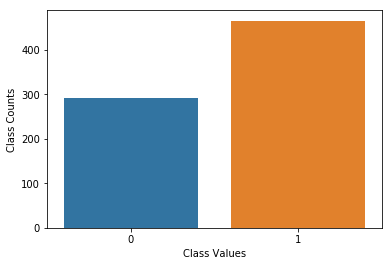

In [9]:
sns.countplot(new_data['Class'].values)
plt.xlabel('Class Values')
plt.ylabel('Class Counts')
plt.show()

<p> After all the impressions are finished, we've come to the pre-processing and analysis sections now. Our process data is found here. In this way, if we save our data from this slingshot data, we can operate more effectively. </p>

In [10]:
index_class=[]
for i in range(100):
    index_class.append(i)

<p> The code snippet on the top represents the numbers we will write in the x index to plot our data. </p>
<p> In the drawing process in the lower part, there are sling and discrete data found within the f1 property found in our data. We want to get a better data set by clearing this data. </p>

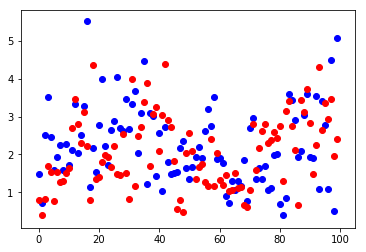

In [11]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f1[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f1[:100],color='r')
plt.show()

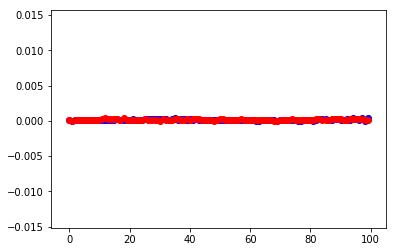

In [12]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f2[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f2[:100],color='r')
plt.show()

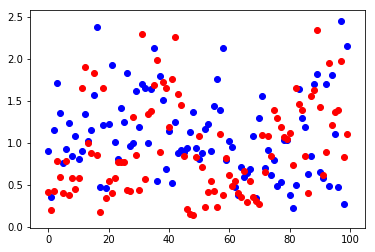

In [13]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f3[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f3[:100],color='r')
plt.show()

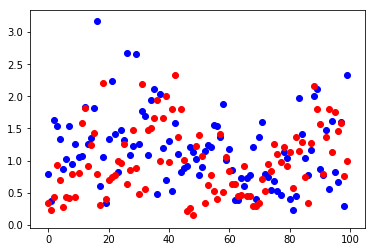

In [14]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f4[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f4[:100],color='r')
plt.show()

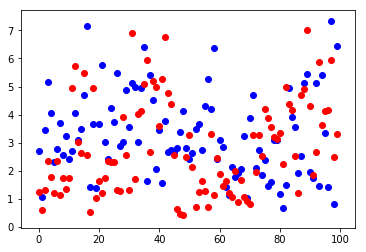

In [15]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f5[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f5[:100],color='r')
plt.show()

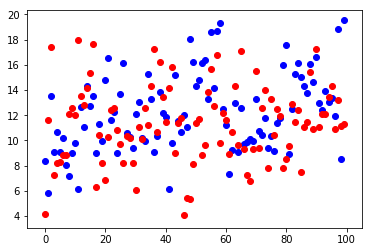

In [16]:
plt.scatter(x=index_class,y=new_data[new_data['Class']==1].f6[:100],color='b')
plt.scatter(x=index_class,y=new_data[new_data['Class']==0].f6[:100],color='r')
plt.show()

In [17]:
new_data.shape

(757, 24)

<p> It is necessary to show the relationships between all our data. This illustration is represented by scatter_matrix. The case shown here shows all the relationships due to a matrix-like structure created between each feature. In this way, the relationships between each data are seen clearly. </p>

ValueError: 'c' argument has 3 elements, which is not acceptable for use with 'x' with size 757, 'y' with size 757.

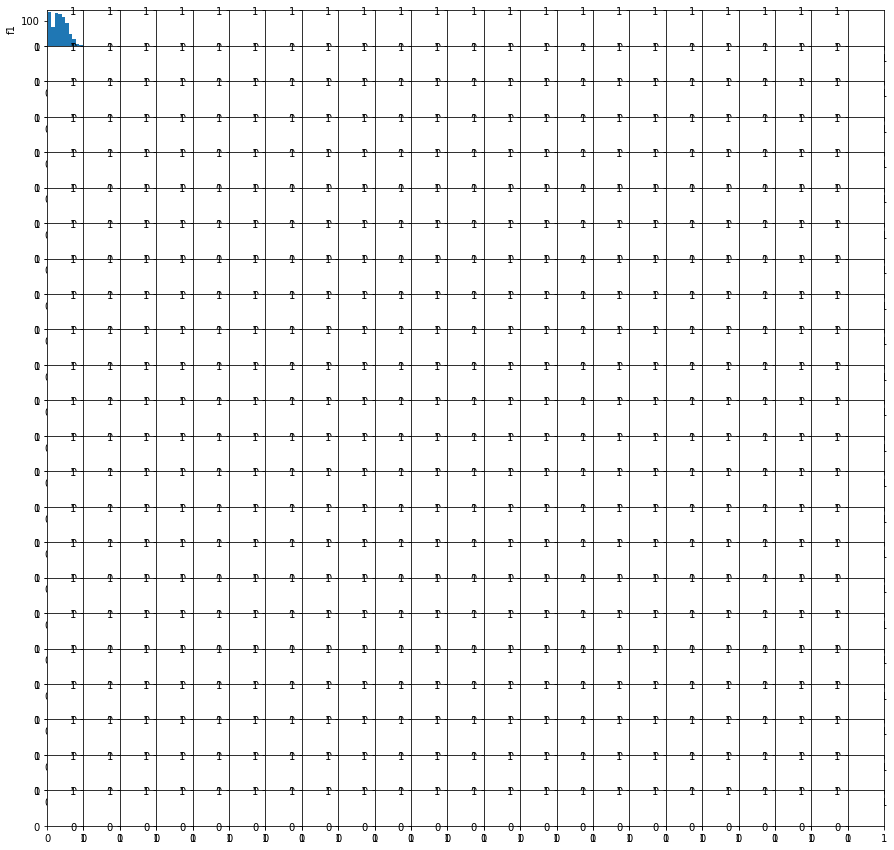

In [18]:
pd.plotting.scatter_matrix(new_data.loc[:,new_data.columns != 'Class'], c=['green','blue','red'],
                            figsize= [15,15],
                            diagonal='hist',
                            alpha=0.8,
                            s = 200,
                            marker = '.',
                            edgecolor= "black")
plt.show()

<p> As a result of the direction from the Scatter matrix, inter-thread operations of each property are filled. For the first 6 properties, however, the same cannot be said for this case, listing them for each case and showing them around the chart. </p>

In [ ]:
liste_data=[]
for i in range(0,252):
    liste_data.append(i)

In [ ]:
for i, col in enumerate(new_data.iloc[:,0:6].columns.values):
    plt.subplot(6, 2, i+1)
    plt.plot(new_data[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
    plt.show()

<p> Analyzes of the patients were taken for the first five lines. </p>
<p>1 ill</p>
<p>0 not ill</p>

In [ ]:
new_data[new_data.Class==1].head()

In [ ]:
new_data[new_data.Class==0].head()

In [ ]:
df = pd.DataFrame(np.random.randn(646, 24), columns=new_data.columns)
scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

<p> Our data is a situation that summarizes the numerical relationships between each other. This corr () function reveals the correlation values between the data. As can be seen, the first five relationships are almost 1.0000 between each other. This is good for now. But if we do this for all features, this is not good. </p>

In [ ]:
new_data.iloc[:,1:5].corr()

<P> data = (data-np.m the (data)) / ((np.max (data) -np.m the (data))) </p>
<p> Above is the process normalization process. In other words, it is the process of pulling the huge differences between the properties to a number between 0-1. </p>

In [ ]:
new_data.isnull().sum()

<p> A different set of data is available through all operations. In this data set, there are voices of different people. These sounds were analyzed and processed. Finally, to install these files into the system as a different csv file is required to install. </p>

In [ ]:
data=pd.read_csv('../input/ML_Parkinson_son_dataset.csv')

In [ ]:
data.shape

In [ ]:
data.Class.value_counts()

<p> All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad. </p>

In [ ]:
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((727,1)).astype(int),values=data,axis=1)

X_l=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
r=sm.OLS(endog=data.iloc[:,-1:],exog=X_l).fit()
print(r.summary())

In [ ]:
dataX=data.drop('Class',axis=1)
dataY=data['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=0)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

<p> The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it. </p>

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<p> We need to reduce the size of our data because our data is very large and increases the transaction volume. As a result, basic component analysis, known as PCA, is used. In this way, we are planning to reduce our number of features from 24 to 19. If we lower it more, this situation is not good at all. In other words, training and test values may decrease. </p>

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=19)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

In [ ]:
X_train=pd.DataFrame(data=X_train,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])
X_test=pd.DataFrame(data=X_test,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19'])
#y_train=pd.DataFrame(data=y_train,columns=['Class'])
#y_test=pd.DataFrame(data=y_test,columns=['Class'])

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

<h1><b>Model Training ve Testing</b></h1>

<p> As a result of our initial evaluations, we have used a number of artificial learning algorithms. These are logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms. The first algorithm is logistic regression algorithm. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values. </p>

<p> First, we have 19 properties. By grouping these features we will see which one is the most successful.</p>

In [ ]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
combine_features_list=[
    ('f1','f2','f3','f4','f5','f6'),
    ('f6','f7','f8','f9','f10','f11'),
    ('f9','f10','f11','f12','f13','f14'),
    ('f15','f16','f17','f18','f19')
]

<p> Logistic Regression </p>
<p> First we need parameters to use our data more effectively. Hyperthermatic technique was used for this condition. This technique is used to express different features in the process. </p>

In [ ]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l1',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=5>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'C': 0.1, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 81</td>
<td>% 78</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'C': 0.5, 'penalty': 'l2', 'random_state': 0}</td>
<td>% 80</td>
<td>% 77</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'C': 0.4, 'penalty': 'l2', 'random_state': 0}</td>
<td>% 64</td>
<td>% 61</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'C': 0.1, 'penalty': 'l1', 'random_state': 0}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [ ]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 

In [ ]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'n_jobs': 2, 'n_neighbors': 22}</td>
<td>% 88</td>
<td>% 87</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'n_jobs': 2, 'n_neighbors': 12}</td>
<td>% 88</td>
<td>% 87</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'n_jobs': 2, 'n_neighbors': 12}</td>
<td>% 69</td>
<td>% 55</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'n_jobs': 2, 'n_neighbors': 3}</td>
<td>% 80</td>
<td>% 62</td>
</tr>

</table>

In [ ]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [ ]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

In [ ]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

In [ ]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'C': 5, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 97</td>
<td>% 92</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'C': 3, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 93</td>
<td>% 85</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'C': 1, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}</td>
<td>% 75</td>
<td>% 54</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'kernel': 'linear', 'random_state': 2}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [ ]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

In [ ]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)

y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
plot_feature_importances(gbc)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 18, 'random_state': 0}</td>
<td>% 83</td>
<td>% 80</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}</td>
<td>% 80</td>
<td>% 77</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 19, 'random_state': 0}</td>
<td>% 77</td>
<td>% 56</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'learning_rate': 0.02, 'n_estimators': 14, 'random_state': 0}</td>
<td>% 41</td>
<td>% 36</td>
</tr>

</table>

In [ ]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)
   
   
    

In [ ]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

In [ ]:
plot_feature_importances(rf)
plt.show()

<table border=2>
<tr>
<th>Özellikler</th>
<th>Parametreler</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
<tr>
<td>(f1', 'f2', 'f3', 'f4', 'f5', 'f6')</td>
<td>{'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 19, 'random_state': 3}</td>
<td>% 98</td>
<td>% 87</td>
</tr>

<tr>
<td>('f6', 'f7', 'f8', 'f9', 'f10', 'f11')</td>
<td>{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 18, 'random_state': 3}</td>
<td>% 97</td>
<td>% 85</td>
</tr>

<tr>
<td>('f9', 'f10', 'f11', 'f12', 'f13', 'f14')</td>
<td>{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 12, 'random_state': 3}</td>
<td>% 89</td>
<td>% 57</td>
</tr>

<tr>
<td>('f15', 'f16', 'f17', 'f18', 'f19')</td>
<td>{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}</td>
<td>% 76</td>
<td>% 46</td>
</tr>

</table>